In [1]:
from google.colab import drive
drive.mount('/content/gdrive',  force_remount = False)

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [3]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [7]:
data_train_path = '/content/gdrive/MyDrive/data/Fruits_Vegetables/train'
data_test_path = '/content/gdrive/MyDrive/data/Fruits_Vegetables/test'
data_val_path = '/content/gdrive/MyDrive/data/Fruits_Vegetables/validation'

In [8]:
img_width = 180
img_height =180

In [9]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [10]:
data_cat = data_train.class_names

In [11]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [12]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [13]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


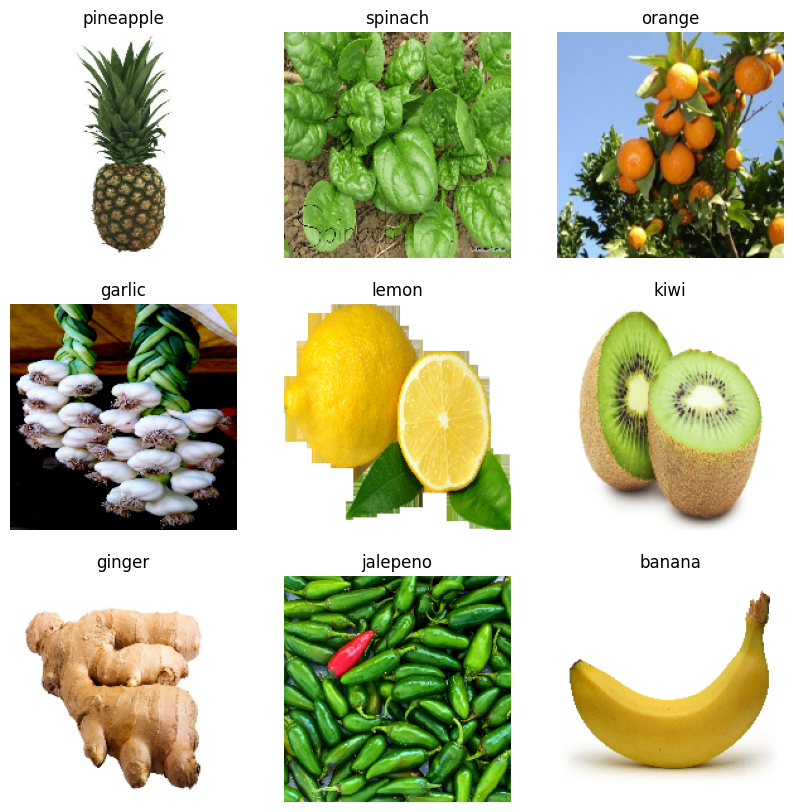

In [14]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [15]:
from tensorflow.keras.models import Sequential

In [16]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [17]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))

])

In [18]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [19]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 556s 6s/step - accuracy: 0.0712 - loss: 3.6148 - val_accuracy: 0.3504 - val_loss: 2.3381
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - accuracy: 0.3049 - loss: 2.4565 - val_accuracy: 0.6410 - val_loss: 1.3575
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy: 0.4805 - loss: 1.8117 - val_accuracy: 0.7293 - val_loss: 0.9880
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 0.6242 - loss: 1.2859 - val_accuracy: 0.8889 - val_loss: 0.5069
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.7700 - loss: 0.7868 - val_accuracy: 0.9060 - val_loss: 0.3925
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 204s 2s/step - accuracy: 0.8894 - loss: 0.4402 - val_accuracy: 0.9288 - val_loss: 0.3933
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 260s 2s/step - accuracy: 0.9221 - loss: 0.3341 - val_accuracy: 0.9402 - val_loss: 0.3512
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 204s 2s/step - accuracy: 0.9494 - loss: 0.2160 - val_accuracy: 0.9601 - v

Text(0.5, 1.0, 'Loss')

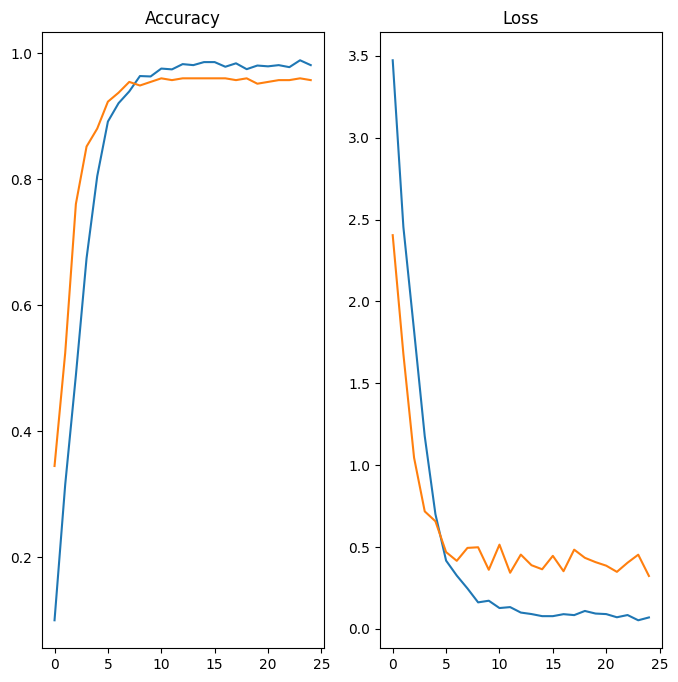

In [ ]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [ ]:
image = 'corn.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [ ]:
predict = model.predict(img_bat)

1/1 [==============================] - 0s 19ms/step


In [ ]:
score = tf.nn.softmax(predict)

In [ ]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is sweetcorn with accuracy of 78.90


In [ ]:
model.save('Image_classify.keras')